In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [115]:
diabetes_data = pd.read_csv('data/diabetes_data.csv')
diabetes_data.info()
diabetes_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               778 non-null    int64  
 1   Glucose                   778 non-null    int64  
 2   BloodPressure             778 non-null    int64  
 3   SkinThickness             778 non-null    int64  
 4   Insulin                   778 non-null    int64  
 5   BMI                       778 non-null    float64
 6   DiabetesPedigreeFunction  778 non-null    float64
 7   Age                       778 non-null    int64  
 8   Outcome                   778 non-null    int64  
 9   Gender                    778 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 60.9+ KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female


In [116]:
diabetes_dedupped = diabetes_data.drop_duplicates()
print(f'Total number of records: {diabetes_dedupped.shape[0]}')
# New data frame without duplicates

Total number of records: 768


In [117]:
# Function to detect columns with low information, i.e. columns with 95% or more repeating values
# or columns with 95% or more unique values
def low_info_detect(df):
    low_information_cols = [] 
    
    for col in df.columns:

        top_freq = df[col].value_counts(normalize=True).max()

        nunique_ratio = df[col].nunique() / df[col].count()

        if top_freq > 0.95:
            low_information_cols.append(col)
            print(f'{col}: {round(top_freq*100, 2)}% repeating values')

        if nunique_ratio > 0.95:
            low_information_cols.append(col)
            print(f'{col}: {round(nunique_ratio*100, 2)}% unique values')
    return low_information_cols

In [118]:
print(low_info_detect(diabetes_dedupped), '\n')
# We have same gender throughout our dataset, so we can drop it

diabetes_clean = diabetes_dedupped.drop(['Gender'], axis=1)
print(f'Resulting number of columns: {diabetes_clean.shape[1]}')

Gender: 100.0% repeating values
['Gender'] 

Resulting number of columns: 9


In [119]:
# All columns have 768 non-null values, we will check for 0 values
# in columns where we can't have 0
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    diabetes_clean[col] = diabetes_clean[col].replace(0, np.nan)

# We can see that SkinThickness and Insulin have a lot of missing values
diabetes_clean.info()
print('\n\nMissing values proportion: ', round(diabetes_clean['Insulin'].isna().sum() / diabetes_clean.shape[0], 2))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 60.0 KB


Missing values proportion:  0.49


In [120]:
# We will get rid of columns where missing values proportion is more than 0.4
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    if diabetes_clean[col].isna().sum() / diabetes_clean.shape[0] > 0.4:
        diabetes_clean = diabetes_clean.drop(col, axis=1)
        
diabetes_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   BMI                       757 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 54.0 KB


In [121]:
# Here I just created a color palette for my plots
cmap = sns.color_palette(['#47009E', '#EBE700'])

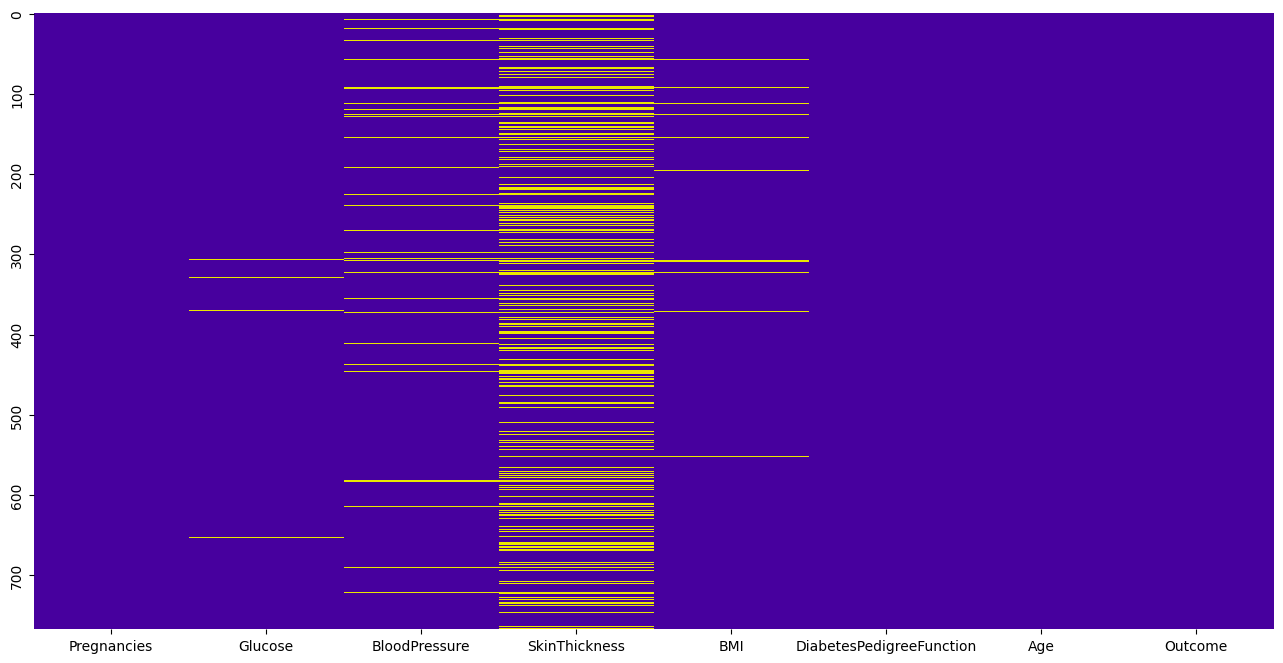

In [122]:
# Creating heatmap of missing values after our initial cleaning
plt.figure(figsize=(16, 8))
sns.heatmap(diabetes_clean.isnull(), cmap=cmap, cbar=False, yticklabels=100)

plt.show()

In [123]:
# Dropping rows with more than 2 missing values
diabetes_clean = diabetes_clean.dropna(thresh=6)
diabetes_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 761 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               761 non-null    int64  
 1   Glucose                   756 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   BMI                       757 non-null    float64
 5   DiabetesPedigreeFunction  761 non-null    float64
 6   Age                       761 non-null    int64  
 7   Outcome                   761 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 53.5 KB


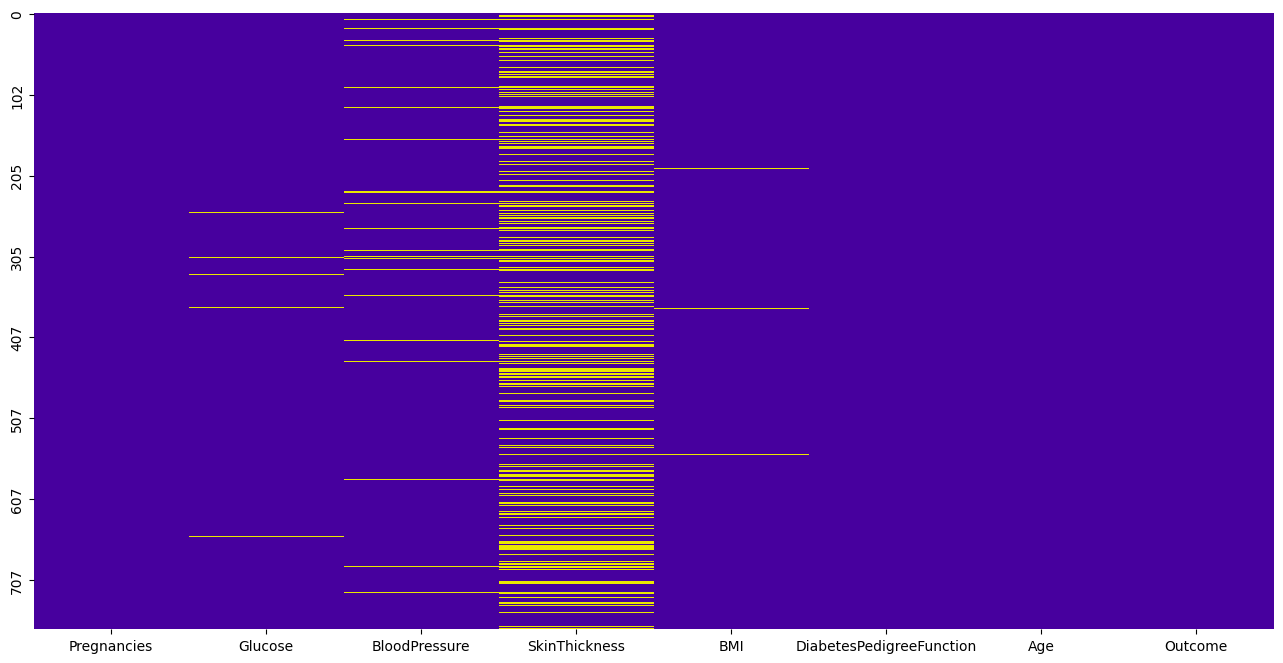

In [124]:
# Visualizing missing data again for comparison
plt.figure(figsize=(16, 8))
sns.heatmap(diabetes_clean.isnull(), cmap=cmap, cbar=False, yticklabels=100)

plt.show()

In [125]:
# Filling missing values with median values
fill_data = diabetes_clean.copy()

values = {
    'Glucose': fill_data['Glucose'].median(),
    'BloodPressure': fill_data['BloodPressure'].median(),
    'SkinThickness': fill_data['SkinThickness'].median(),
    'BMI': fill_data['BMI'].median(),
}

fill_data = fill_data.fillna(values)

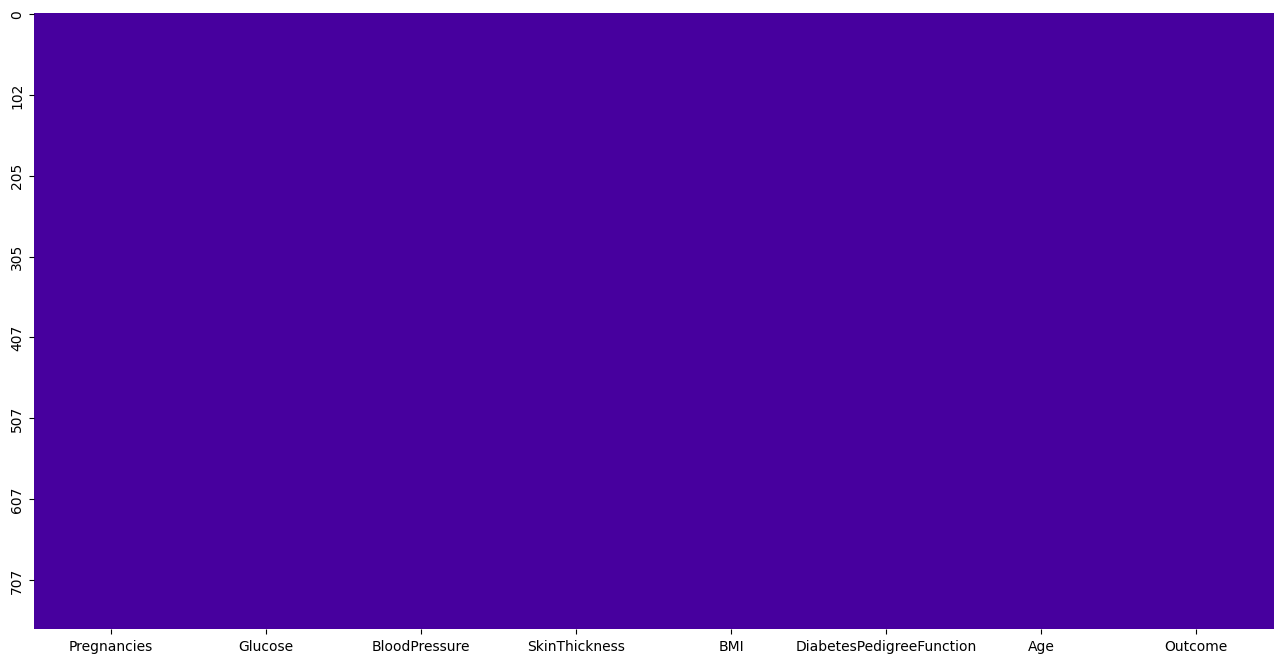

<class 'pandas.core.frame.DataFrame'>
Int64Index: 761 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               761 non-null    int64  
 1   Glucose                   761 non-null    float64
 2   BloodPressure             761 non-null    float64
 3   SkinThickness             761 non-null    float64
 4   BMI                       761 non-null    float64
 5   DiabetesPedigreeFunction  761 non-null    float64
 6   Age                       761 non-null    int64  
 7   Outcome                   761 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 53.5 KB


In [126]:
plt.figure(figsize=(16, 8))
sns.heatmap(fill_data.isnull(), cmap=cmap, cbar=False, yticklabels=100)

plt.show()
fill_data.info()

In [127]:
def outliers_iqr(data, feature, log_scale=False, left=1.5, right=1.5):
    '''
    This function identifies outliers using the interquartile range (IQR) method.
    It takes a dataset, a feature name, and optional parameters for log scaling, left and right factors for bounds calculation.
    Left and right factors are 1.5 by default, according to the Tukey's rule.
    It calculates the range between the first quartile (Q1) and the third quartile (Q3).
    Any data point below Q1 minus a specified factor or above Q3 plus a specified factor is considered an outlier.
    
    It returns two DataFrames: 'outliers' and 'cleaned'.
    'outliers' contains rows with values outside the calculated bounds, and 'cleaned' contains rows within the bounds.
    '''
    
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [128]:
for i in ['Glucose', 'BloodPressure', 'SkinThickness', 'DiabetesPedigreeFunction', 'BMI']:
    outliers, cleaned = outliers_iqr(fill_data, i)
    print(f"Number of outliers according to Tukey's method in {i}: {outliers.shape[0]}")
    print(f'Number of clean data records (inliers): {cleaned.shape[0]}', '\n')

Number of outliers according to Tukey's method in Glucose: 0
Number of clean data records (inliers): 761 

Number of outliers according to Tukey's method in BloodPressure: 14
Number of clean data records (inliers): 744 

Number of outliers according to Tukey's method in SkinThickness: 87
Number of clean data records (inliers): 674 

Number of outliers according to Tukey's method in DiabetesPedigreeFunction: 29
Number of clean data records (inliers): 732 

Number of outliers according to Tukey's method in BMI: 8
Number of clean data records (inliers): 753 



In [129]:
def outliers_z_score(data, feature, log_scale=False, left=3, right=3):
    '''
    The outliers_z_score function identifies outliers using the z-score method.
    It calculates the z-score for each value in a specified feature of a dataset,
    which represents how many standard deviations away from the mean the value is.
    By defining upper and lower bounds based on a specified number of standard deviations from the mean,
    values that fall outside these bounds are considered outliers.
    
    It returns two DataFrames: 'outliers' and 'cleaned'.
    'outliers' contains rows with values outside the calculated bounds, and 'cleaned' contains rows within the bounds.
    '''
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [131]:
for i in ['Glucose', 'BloodPressure', 'SkinThickness', 'DiabetesPedigreeFunction', 'BMI']:
    outliers, cleaned = outliers_z_score(fill_data, i)
    print(f"Number of outliers by z-score in {i}: {outliers.shape[0]}")
    print(f'Number of clean data records (inliers): {cleaned.shape[0]}', '\n')

Number of outliers by z-score in Glucose: 0
Number of clean data records (inliers): 761 

Number of outliers by z-score in BloodPressure: 8
Number of clean data records (inliers): 753 

Number of outliers by z-score in SkinThickness: 4
Number of clean data records (inliers): 757 

Number of outliers by z-score in DiabetesPedigreeFunction: 11
Number of clean data records (inliers): 750 

Number of outliers by z-score in BMI: 5
Number of clean data records (inliers): 756 

